# Import & configure library

In [1]:
import platform
import time
import gc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn


In [2]:
print(f'{platform.python_version()=}')

print(f'{np.__version__=}')
print(f'{pd.__version__=}')
print(f'{matplotlib.__version__=}')
print(f'{sklearn.__version__=}')


platform.python_version()='3.8.3rc1'
np.__version__='1.17.4'
pd.__version__='1.0.3'
matplotlib.__version__='3.2.1'
sklearn.__version__='0.22.2.post1'


In [3]:
SEED = 42
np.random.seed(SEED)

START_TIME = time.time()


In [4]:
## Load preprocessed dataset

In [5]:
dataset = pd.read_pickle('./dataset.pk')


## TF IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=25, norm='l1', lowercase=False)
X = vectorizer.fit_transform(dataset['content'])


# K-means++

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=SEED, verbose=1, n_init=10, precompute_distances=True)
y_pred = kmeans.fit_predict(X)


Initialization complete
Iteration  0, inertia 1609.289
Iteration  1, inertia 985.261
Iteration  2, inertia 972.488
Iteration  3, inertia 968.852
Iteration  4, inertia 967.623
Iteration  5, inertia 966.862
Iteration  6, inertia 966.456
Iteration  7, inertia 966.220
Iteration  8, inertia 966.107
Iteration  9, inertia 966.066
Iteration 10, inertia 966.043
Iteration 11, inertia 966.028
Iteration 12, inertia 966.022
Iteration 13, inertia 966.017
Iteration 14, inertia 966.013
Iteration 15, inertia 966.008
Iteration 16, inertia 965.997
Iteration 17, inertia 965.916
Iteration 18, inertia 965.335
Iteration 19, inertia 964.053
Iteration 20, inertia 963.155
Iteration 21, inertia 962.637
Iteration 22, inertia 962.326
Iteration 23, inertia 962.155
Iteration 24, inertia 962.001
Iteration 25, inertia 961.822
Iteration 26, inertia 961.575
Iteration 27, inertia 961.316
Iteration 28, inertia 961.060
Iteration 29, inertia 960.835
Iteration 30, inertia 960.685
Iteration 31, inertia 960.635
Iteration 32, i

# PCA for 3D visualization

In [8]:
from sklearn.decomposition import TruncatedSVD
pca = [
    TruncatedSVD(n_components=3, algorithm='arpack', random_state=SEED),
    TruncatedSVD(n_components=3, algorithm='randomized', n_iter=10, random_state=SEED)
]
pca_variance = []

for i in range(len(pca)):
    pca[i] = pca[i].fit(X)

    gc.collect()
    print(f'Variance for pca[{i}] : {pca[i].explained_variance_ratio_.sum()}')
    pca_variance.append(pca[i].explained_variance_ratio_.sum())

# select best PCA
index_best_pca = pca_variance.index(max(pca_variance))
X_reduced = pca[i].transform(X)


Variance for pca[0] : 0.05520272086757224
Variance for pca[1] : 0.055202720760736304


# Cluster 3D visualization
 Source : https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py

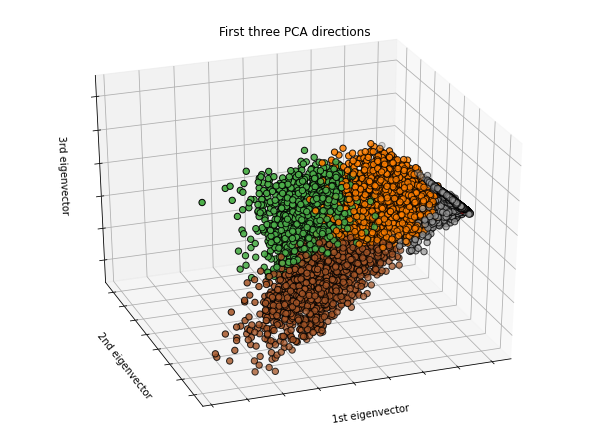

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_pred,
           cmap='Set1', edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()



# Supervised evaluation

In [10]:
from sklearn import metrics
y_true = dataset['topic'].to_list()


In [11]:
print(f'{metrics.adjusted_rand_score(y_true, y_pred)=}')
print(f'{metrics.homogeneity_score(y_true, y_pred)=}')
print(f'{metrics.completeness_score(y_true, y_pred)=}')
print(f'{metrics.v_measure_score(y_true, y_pred)=}')
print(f'{metrics.fowlkes_mallows_score(y_true, y_pred)=}')


metrics.adjusted_rand_score(y_true, y_pred)=0.3583653763786496
metrics.homogeneity_score(y_true, y_pred)=0.48606249528892637
metrics.completeness_score(y_true, y_pred)=0.8130287205170411
metrics.v_measure_score(y_true, y_pred)=0.6083988003735386
metrics.fowlkes_mallows_score(y_true, y_pred)=0.6210833495522297


# Unsupervised evaluation

In [12]:
print(f'{metrics.calinski_harabasz_score(X.toarray(), y_pred)=}')
print(f'{metrics.silhouette_score(X, y_pred, sample_size=X.shape[0] // 5)=}')
print(f'{metrics.davies_bouldin_score(X.toarray(), y_pred)=}')


metrics.calinski_harabasz_score(X.toarray(), y_pred)=669.9463630311741
metrics.silhouette_score(X, y_pred, sample_size=X.shape[0] // 5)=0.028479348370840964
metrics.davies_bouldin_score(X.toarray(), y_pred)=5.508398316924348


In [14]:
END_TIME = time.time()
TOTAL_SECONDS = END_TIME - START_TIME
print(f'{TOTAL_SECONDS=}')


TOTAL_SECONDS=1270.965618133545
